# Agent-based modelling

TO DO: 
[] Only look at the top candidates when promoting -> This will also save computing time


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from ABM_functions import *
import pandas as pd

#### Setting up parameters

In [4]:
company_titles = ['C-Suite', 'SVP', 'VP', 'Senior Manager', 'Manager', 'Entry Level'] # job titles for agents in company
n = 50
titles_n = [n, n*10, n*20, n*30,  n*40,  n*50] # number of agents in each job title
bias = 0 # bias for the company's promotion process (positive bias = males are more likely to be promoted, negative bias = females are more likely to be promoted)

# weights for generating agents (populating company + new agents at the lowest level)
# possibly create a function for this?


weights = {
    'C-Suite':{
        'weights': [0.81, 0.19], # first weight is male, second is female
        'age': [50, 8], # mean and standard deviation for random.gauss function
        'seniority': [5, 3], # mean and standard deviation for random.gauss function
        'fire': [0.001, 1], # first is weight of being fired, second is weight of not being fired
        'seniority_position': [3, 1], # first is true, second is false
        'candidates': 10}, # number of candidates to be considered for promotion to this level
    'SVP':{
        'weights': [0.76, 0.24], 
        'age': [50, 8],
        'seniority': [5, 3],
        'fire': [0.001, 1],
        'seniority_position': [3, 1],
        'candidates': 20},
    'VP':{
        'weights': [0.71, 0.29],
        'age': [50, 8],
        'seniority': [5, 3],
        'fire': [0.001, 1],
        'seniority_position': [3, 1],
        'candidates': 30},
    'Senior Manager':{
        'weights': [0.67, 0.33], 
        'age': [40, 6],
        'seniority': [5, 3],
        'fire': [0.001, 1],
        'seniority_position': [3, 1],
        'candidates': 40}, 
    'Manager':{
        'weights': [0.63, 0.37],
        'age': [35, 6],
        'seniority': [4, 1],
        'fire': [0.001, 1],
        'seniority_position': [3, 1],
        'candidates': 50},
    'Entry Level':{
        'weights': [0.54, 0.46], 
        'age': [30, 6],
        'seniority':[3, 1],
        'fire': [0.001, 1],
        'seniority_position': [3, 1]}
    }


## Running the agent-based model for the period we have data for

tick 0 done
tick 1 done
tick 2 done
tick 3 done
tick 4 done
tick 5 done
tick 6 done
tick 7 done
tick 8 done
tick 9 done
tick 10 done
tick 11 done
tick 12 done
tick 13 done
tick 14 done
tick 15 done
tick 16 done
tick 17 done
tick 18 done
tick 19 done
tick 20 done
tick 21 done
tick 22 done
tick 23 done
tick 24 done
tick 25 done
tick 26 done
tick 27 done
tick 28 done
tick 29 done
tick 30 done
tick 31 done
tick 32 done
tick 33 done
tick 34 done
tick 35 done
tick 36 done
tick 37 done
tick 38 done
tick 39 done
tick 40 done
tick 41 done
tick 42 done
tick 43 done
tick 44 done
tick 45 done
tick 46 done
tick 47 done
tick 48 done
tick 49 done
tick 50 done
tick 51 done
tick 52 done
tick 53 done
tick 54 done
tick 55 done
tick 56 done
tick 57 done
tick 58 done
tick 59 done


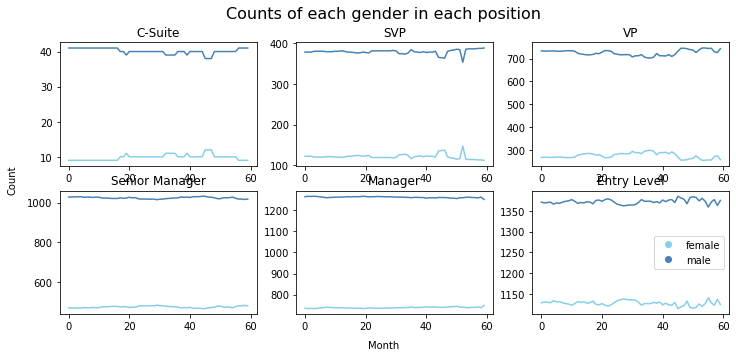

In [5]:
run_abm(months = 5*12, 
        save_path='data/data.csv', # the path for saving the data
        company_titles = company_titles, # the job titles in the company
        titles_n = titles_n, # the number of employees with each of the titles
        weights = weights, 
        plot_each_tick = False,
        bias = bias)

### TRYING OUT STUFF BEFORE ADDING TO ABM_FUNCTIONS

In [3]:
company = create_company(company_titles, titles_n)

In [4]:
populate_company(company, weights)